<a href="https://colab.research.google.com/github/msiplab/AtipWork/blob/develop/python/sample03_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<u,v> = 0


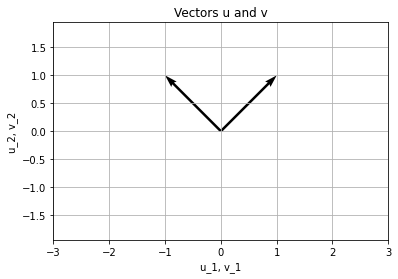

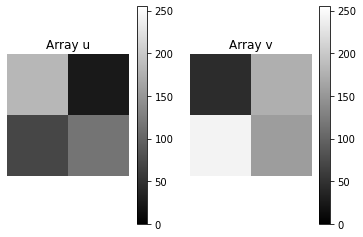

<u,v> = -0.713238
||v||_1 = 2.000000


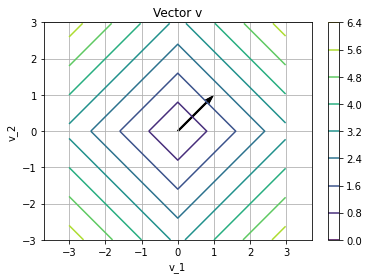

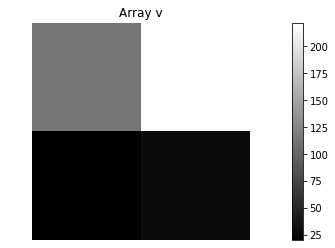

||v||_1 = 3.523187


In [1]:

# -*- coding: utf-8 -*-
#%% Sample 3-1
#%% 平滑化／先鋭化処理
# 内積とノルム 
# 
# 画像処理特論
# 
# 村松 正吾 
# 
# 動作確認: Python 3.7, PyTorch 1.8
#%% Image smoothing/sharpening
# Inner product and norm
# 
# Advanced Topics in Image Processing
# 
# Shogo MURAMATSU
# 
# Verified: Python 3.7, PyTorch 1.8
# 準備
# (Preparation)
import torch
import torchvision
from matplotlib import pyplot as plt

#%% $N$次元ベクトルの内積
# (Inner product of $N$-dimensional vectors)
# 
# $$\langle \mathbf{u},\mathbf{v}\rangle=\sum_{i=0}^{N-1}u_{i}v_{i}$$
# 
# ただし， $u_i, v_i$はベクトル $\mathbf{u}, \mathbf{v}\in\mathbb{R}^{N}$ の $i$-番目要素 
# $[\mathbf{u}]_i,$$[\mathbf{v}]_i$。
# 
# (where $u_i, v_i$ are the $i$-th element of vector $\mathbf{u}, \mathbf{v}\in\mathbb{R}^{N}$ 
# , i.e.,  $[\mathbf{u}]_i,$$[\mathbf{v}]_i$, respectively.)

# Generate an two-dimensional vector u 
u1 = -1
u2 = 1
u = torch.tensor([u1, u2]).T
# Generate an two-dimensional vector v 
v1 = 1
v2 = 1
v = torch.tensor([v1, v2]).T
# Inner product of vectors u and v
innerprod = torch.dot(u,v)
print('<u,v> = %d'%innerprod)
# Plot vector v with the contour plot of lp-norm

plt.figure(1)
V = torch.cat((u.unsqueeze(1),v.unsqueeze(1)),1)
origin = torch.zeros(2,2)
plt.quiver(*origin,V[0,:],V[1,:],angles='xy',scale_units='xy',scale=1)
plt.title('Vectors u and v')
plt.xlabel('u_1, v_1')
plt.ylabel('u_2, v_2')
plt.axis('equal')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.grid()
plt.show()
#%% ベクトルとしてみた$N_1 \times N_2$配列の 内積
# (Inner product of $N_1 \times N_2$ arrays as vector)
# 
# $$\langle\mathbf{u},\mathbf{v}\rangle=\sum_{j=0}^{N_2-1}\sum_{i=0}^{N_1-1}u_{i,j}v_{i,j}$$
# 
# ただし， $u_{i,j}, v_{i,j}$はベクトル $\mathbf{u}, \mathbf{v}\in\mathbb{R}^{N_1\times 
# N_2}$ の $i,j$-番目要素 $[\mathbf{u}]_{i,j},[\mathbf{v}]_{i,j}$。
# 
# ( where $u_{i,j}, v_{i,j}$ are the $i,j$-th element of vector $\mathbf{u}, 
# \mathbf{v}\in\mathbb{R}^{N}$ , i.e.,  $[\mathbf{u}]_{i,j},[\mathbf{v}]_{i,j}$, 
# respectively.)

# Array dimension
ndim1 = 2
ndim2 = 2
# Generate a N1xN2 arrya v with normally distributed random numbers
u = torch.randn(ndim1,ndim2)
v = torch.randn(ndim1,ndim2)
# Visualization of array u
topilimg = torchvision.transforms.ToPILImage()
plt.figure(2)
plt.subplot(121)
plt.imshow(topilimg(u),cmap='gray')
plt.clim(0,255)
plt.title('Array u')
plt.colorbar()
plt.axis('off')

# Visualization of array v
plt.subplot(122)
plt.imshow(topilimg(v),cmap='gray')
plt.clim(0,255)
plt.title('Array v')
plt.colorbar()
plt.axis('off')
plt.show()
#%%
# Inner product of arrays u and v as vectors
innerprod = u.view(-1).dot(v.view(-1))
print('<u,v> = %f'%innerprod)

#%% $N$次元ベクトルの $\ell_p$-ノルム
# ($\ell_p$-norm of a $N$-dimensional vector)
# 
# $$\|\mathbf{v}\|_{p}=\left(\sum_{i=0}^{N-1}\left|v_{i}\right|^{p}\right)^{\frac{1}{p}}$$
# 
# ただし， $v_i$はベクトル $\mathbf{v}\in\mathbb{R}^{N}$ の $i$-番目要素 $[\mathbf{v}]_i$。
# 
# (where $v_i$ stands for the $i$-th element of vector $\mathbf{v}\in\mathbb{R}^{N}$ 
# , i.e.,  $[\mathbf{v}]_i$.)

# Generate an two-dimensional vector v 
v1 = 1.
v2 = 1.
v = torch.tensor([v1, v2]).T
# Setting of parameter p
p = 1

# lp-norm of v
lpnorm = v.norm(p=p)
print('||v||_%d = %f'%(p,lpnorm))
# Plot vector v with the contour plot of lp-norm
plt.figure(3)
origin = torch.zeros(2,2)
plt.quiver(*origin,v[0],v[1],angles='xy',scale_units='xy',scale=1)
plt.title('Vector v')
plt.xlabel('v_1')
plt.ylabel('v_2')
plt.axis('equal')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.grid()


# Contour plot of lp-norm
delta = 1/40.
x = torch.arange(-3.,3.,delta)
y = torch.arange(-3.,3.,delta)
X, Y = torch.meshgrid(x,y)
Z = (abs(X)**p+abs(Y)**p)**(1./p)
#fcontour(@(v1,v2) vecnorm([v1(:) v2(:)].',p),[-3 3 -3 3])
plt.contour(X, Y, Z)
plt.colorbar()
plt.show()

# ベクトルとしてみた$N_1 \times N_2$配列の $\ell_p$-ノルム
# ($\ell_p$-norm of a $N_1 \times N_2$ array as a vector)
# 
# $$\|\mathbf{v}\|_{p}=\left(\sum_{j=0}^{N_2-1}\sum_{i=0}^{N_1-1}\left|v_{i,j}\right|^{p}\right)^{\frac{1}{p}}$$
# 
# ただし， $v_{i,j}$はベクトルとしてみた配列 $\mathbf{v}\in\mathbb{R}^{N_1\times N_2}$ の $i,j$-番目要素 
# $[\mathbf{v}]_{i,j}$。
# 
# (where $v_{i,j}$ stands for the $i,j$-th element of array $\mathbf{v}$ as 
# a vector, i.e.,  $[\mathbf{v}]_{i,j}$.)

# Array dimension
ndim1 = 2
ndim2 = 2
# Generate a N1xN2 arrya v with normally distributed random numbers
v = torch.randn(ndim1,ndim2)
# Visualization of array v
plt.figure(4)
plt.imshow(topilimg(v),cmap='gray')
plt.title('Array v')
plt.colorbar()
plt.axis('equal')
plt.axis('off')
plt.show()
#%%
# Setting of parameter p
p = 1

# lp-(element-wise) norm of v
lpnorm = torch.linalg.norm(v.view(-1),ord=p)
print('||v||_%d = %f'%(p,lpnorm))
#%% 
# © Copyright, Shogo MURAMATSU, All rights reserved.
